In [5]:
import rnnSMAP
import numpy as np
import pandas as pd
import torch
import argparse

In [6]:
import imp
imp.reload(rnnSMAP)
rnnSMAP.reload()

opt = rnnSMAP.classLSTM.optLSTM(
    rootDB=rnnSMAP.kPath['DB_L3_NA'],
    rootOut=rnnSMAP.kPath['Out_L3_NA'],
    syr=2017, eyr=2017,
    var='varLst_Forcing', varC='varConstLst_Noah',
    train='CONUSv16f1', dr=0.5, modelOpt='relu',
    target='SMAP_AM',gpu=0
)

load rnnSMAP


In [ ]:
opt['model'] = 'closed_loop'
opt['out'] = 'closed_loop'
rnnSMAP.funLSTM.trainLSTM(opt)

out = opt['out']
rootOut = rnnSMAP.kPath['Out_L3_NA']
syr = 2015
eyr = 2016

/Users/rajdesai/Desktop/Hydro/data/Daily_L3_NA/Subset/CONUSv16f1.csv
read /Users/rajdesai/Desktop/Hydro/data/Daily_L3_NA/CONUSv16f1/2017/APCP_FORA.csv 0.0305788516998291
read /Users/rajdesai/Desktop/Hydro/data/Daily_L3_NA/CONUSv16f1/2017/DLWRF_FORA.csv 0.030045270919799805
read /Users/rajdesai/Desktop/Hydro/data/Daily_L3_NA/CONUSv16f1/2017/DSWRF_FORA.csv 0.02330803871154785
read /Users/rajdesai/Desktop/Hydro/data/Daily_L3_NA/CONUSv16f1/2017/TMP_2_FORA.csv 0.022517919540405273
read /Users/rajdesai/Desktop/Hydro/data/Daily_L3_NA/CONUSv16f1/2017/SPFH_2_FORA.csv 0.029582977294921875
read /Users/rajdesai/Desktop/Hydro/data/Daily_L3_NA/CONUSv16f1/2017/VGRD_10_FORA.csv 0.033631086349487305
read /Users/rajdesai/Desktop/Hydro/data/Daily_L3_NA/CONUSv16f1/2017/UGRD_10_FORA.csv 0.03145027160644531
read /Users/rajdesai/Desktop/Hydro/data/Daily_L3_NA/CONUSv16f1/2017/SMAP_AM.csv 0.02871561050415039
Epoch 1 Loss 0.781 time 0.66
Epoch 2 Loss 0.369 time 0.55
Epoch 3 Loss 0.195 time 0.51
Epoch 4 Loss 0.1

Epoch 239 Loss 0.062 time 0.54
Epoch 240 Loss 0.066 time 0.60
Epoch 241 Loss 0.064 time 0.46
Epoch 242 Loss 0.071 time 0.60
Epoch 243 Loss 0.062 time 0.58
Epoch 244 Loss 0.067 time 0.41
Epoch 245 Loss 0.064 time 0.49
Epoch 246 Loss 0.061 time 0.41
Epoch 247 Loss 0.065 time 0.43
Epoch 248 Loss 0.067 time 0.54
Epoch 249 Loss 0.061 time 0.52
Epoch 250 Loss 0.064 time 0.58
Epoch 251 Loss 0.065 time 0.71
Epoch 252 Loss 0.062 time 0.56
Epoch 253 Loss 0.066 time 0.56
Epoch 254 Loss 0.069 time 0.65
Epoch 255 Loss 0.060 time 0.80
Epoch 256 Loss 0.061 time 0.56
Epoch 257 Loss 0.064 time 0.62
Epoch 258 Loss 0.063 time 0.51
Epoch 259 Loss 0.068 time 0.47
Epoch 260 Loss 0.063 time 0.76
Epoch 261 Loss 0.063 time 0.68
Epoch 262 Loss 0.062 time 0.93
Epoch 263 Loss 0.066 time 0.63
Epoch 264 Loss 0.063 time 0.66
Epoch 265 Loss 0.061 time 0.66
Epoch 266 Loss 0.062 time 0.54
Epoch 267 Loss 0.061 time 0.52
Epoch 268 Loss 0.062 time 0.43
Epoch 269 Loss 0.065 time 0.51
Epoch 270 Loss 0.063 time 0.60
Epoch 27

Exception in callback BaseAsyncIOLoop._handle_events(14, 1)
handle: <Handle BaseAsyncIOLoop._handle_events(14, 1)>
Traceback (most recent call last):
  File "/usr/local/Cellar/python/3.6.5/Frameworks/Python.framework/Versions/3.6/lib/python3.6/asyncio/events.py", line 145, in _run
    self._callback(*self._args)
  File "/usr/local/lib/python3.6/site-packages/tornado/platform/asyncio.py", line 122, in _handle_events
    handler_func(fileobj, events)
  File "/usr/local/lib/python3.6/site-packages/tornado/stack_context.py", line 300, in null_wrapper
    return fn(*args, **kwargs)
  File "/usr/local/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 450, in _handle_events
    self._handle_recv()
  File "/usr/local/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 480, in _handle_recv
    self._run_callback(callback, msg)
  File "/usr/local/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 432, in _run_callback
    callback(*args, **kwargs)
  File "/usr/lo

In [7]:
out = 'closed_loop'
testName = 'CONUSv16f1'
rootDB = rnnSMAP.kPath['DB_L3_NA']
rootOut = rnnSMAP.kPath['Out_L3_NA']

In [8]:
ds1 = rnnSMAP.classDB.DatasetPost(rootDB=rootDB, subsetName=testName, yrLst=[2017])# define dataset
ds1.readData(var='SMAP_AM', field='SMAP')# read target
ds1.readPred(rootOut=rootOut, out=out, drMC=0, field='LSTM')# read prediction
statErr1 = ds1.statCalError(predField='LSTM', targetField='SMAP')# calculate error

/Users/rajdesai/Desktop/Hydro/data/Daily_L3_NA/Subset/CONUSv16f1.csv
read /Users/rajdesai/Desktop/Hydro/data/Daily_L3_NA/CONUSv16f1/2017/SMAP_AM.csv 0.03324484825134277
running test
/Users/rajdesai/Desktop/Hydro/data/Daily_L3_NA/Subset/CONUSv16f1.csv
read /Users/rajdesai/Desktop/Hydro/data/Daily_L3_NA/CONUSv16f1/2017/APCP_FORA.csv 0.025861024856567383
read /Users/rajdesai/Desktop/Hydro/data/Daily_L3_NA/CONUSv16f1/2017/DLWRF_FORA.csv 0.030211687088012695
read /Users/rajdesai/Desktop/Hydro/data/Daily_L3_NA/CONUSv16f1/2017/DSWRF_FORA.csv 0.024955272674560547
read /Users/rajdesai/Desktop/Hydro/data/Daily_L3_NA/CONUSv16f1/2017/TMP_2_FORA.csv 0.021469831466674805
read /Users/rajdesai/Desktop/Hydro/data/Daily_L3_NA/CONUSv16f1/2017/SPFH_2_FORA.csv 0.03443574905395508
read /Users/rajdesai/Desktop/Hydro/data/Daily_L3_NA/CONUSv16f1/2017/VGRD_10_FORA.csv 0.03911089897155762
read /Users/rajdesai/Desktop/Hydro/data/Daily_L3_NA/CONUSv16f1/2017/UGRD_10_FORA.csv 0.027565956115722656


/usr/local/lib/python3.6/site-packages/torch/serialization.py:425: SourceChangeWarning: source code of class 'rnnSMAP.classLSTM.torchLSTM_closed_loop_cell' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)


saving /Users/rajdesai/Desktop/Hydro/output/L3_NA/closed_loop/test_CONUSv16f1_2017_2017_ep500.csv
reading /Users/rajdesai/Desktop/Hydro/output/L3_NA/closed_loop/test_CONUSv16f1_2017_2017_ep500.csv


In [9]:
ds2 = rnnSMAP.classDB.DatasetPost(rootDB=rootDB, subsetName=testName, yrLst=[2015, 2016])
ds2.readData(var='SMAP_AM', field='SMAP')
ds2.readPred(rootOut=rootOut, out=out, drMC=0, field='LSTM')
statErr2 = ds2.statCalError(predField='LSTM', targetField='SMAP')

/Users/rajdesai/Desktop/Hydro/data/Daily_L3_NA/Subset/CONUSv16f1.csv
read /Users/rajdesai/Desktop/Hydro/data/Daily_L3_NA/CONUSv16f1/2015/SMAP_AM.csv 0.029139995574951172
read /Users/rajdesai/Desktop/Hydro/data/Daily_L3_NA/CONUSv16f1/2016/SMAP_AM.csv 0.024698972702026367
running test
/Users/rajdesai/Desktop/Hydro/data/Daily_L3_NA/Subset/CONUSv16f1.csv
read /Users/rajdesai/Desktop/Hydro/data/Daily_L3_NA/CONUSv16f1/2015/APCP_FORA.csv 0.017364025115966797
read /Users/rajdesai/Desktop/Hydro/data/Daily_L3_NA/CONUSv16f1/2016/APCP_FORA.csv 0.015365123748779297
read /Users/rajdesai/Desktop/Hydro/data/Daily_L3_NA/CONUSv16f1/2015/DLWRF_FORA.csv 0.021539926528930664
read /Users/rajdesai/Desktop/Hydro/data/Daily_L3_NA/CONUSv16f1/2016/DLWRF_FORA.csv 0.019514083862304688
read /Users/rajdesai/Desktop/Hydro/data/Daily_L3_NA/CONUSv16f1/2015/DSWRF_FORA.csv 0.025316953659057617
read /Users/rajdesai/Desktop/Hydro/data/Daily_L3_NA/CONUSv16f1/2016/DSWRF_FORA.csv 0.026781797409057617
read /Users/rajdesai/Desk

/usr/local/lib/python3.6/site-packages/torch/serialization.py:425: SourceChangeWarning: source code of class 'rnnSMAP.classLSTM.torchLSTM_closed_loop_cell' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)


saving /Users/rajdesai/Desktop/Hydro/output/L3_NA/closed_loop/test_CONUSv16f1_2015_2016_ep500.csv
reading /Users/rajdesai/Desktop/Hydro/output/L3_NA/closed_loop/test_CONUSv16f1_2015_2016_ep500.csv


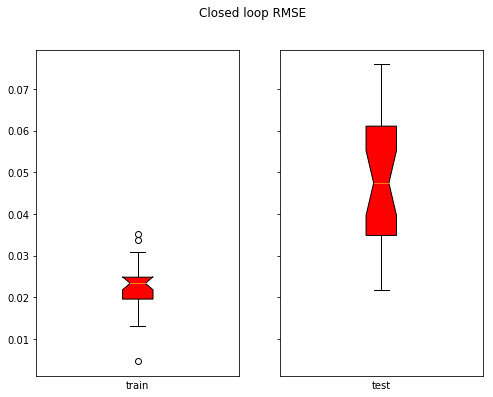

In [11]:
strE = 'RMSE'
dataErr = [getattr(statErr1, strE), getattr(statErr2, strE)]
fig = rnnSMAP.funPost.plotBox(dataErr, labelC=['train', 'test'], title='Closed loop ' + strE)